In [1]:
import os
import cv2
import pandas as pd

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras.preprocessing import image

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'mask_detect.ipynb',
 'my_model.keras',
 'sample',
 'train']

In [6]:
categories=['with_mask','without_mask']

In [7]:
data=[]
for category in categories:
    path = os.path.join('train',category)
    label=categories.index(category)
    for file in os.listdir(path):
        img_path = os.path.join(path,file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))
        data.append([img,label])

In [8]:
len(data)

200

In [9]:
import random

In [10]:
random.shuffle(data)


In [11]:
x = []
y = []
for features,label in data:
    x.append(features)
    y.append(label)

In [12]:
len(x)

200

In [13]:
len(y)

200

In [14]:
import numpy as np

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
x.shape

(200, 224, 224, 3)

In [17]:
y.shape

(200,)

In [18]:
y

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [19]:
x = x/255

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape

(160, 224, 224, 3)

In [22]:
x_test.shape

(40, 224, 224, 3)

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10 
)

model.save('my_model.keras')
print("✅ Model saved as my_model.keras")


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5298 - loss: 1.2895 - val_accuracy: 0.5000 - val_loss: 0.7714
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6110 - loss: 0.6759 - val_accuracy: 0.7500 - val_loss: 0.4620
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8778 - loss: 0.3837 - val_accuracy: 0.8750 - val_loss: 0.2739
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9238 - loss: 0.2352 - val_accuracy: 0.9750 - val_loss: 0.1682
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9502 - loss: 0.1465 - val_accuracy: 0.8750 - val_loss: 0.2060
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9280 - loss: 0.2434 - val_accuracy: 0.9750 - val_loss: 0.1142
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9599 - loss: 0.1481 - val_accuracy: 1.0000 - val_loss: 0.0634
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy:

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.compile()

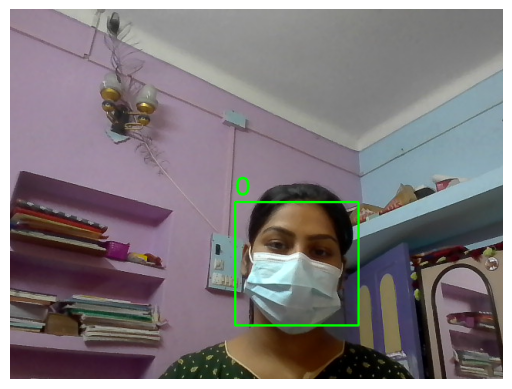

⏱️ 20 seconds done. Stopping.
✅ Camera released & windows closed.


<Figure size 640x480 with 0 Axes>

In [26]:
import cv2
import numpy as np
import time
from tensorflow.keras.models import load_model
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

model = load_model('my_model.keras')  

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face_mask(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (224, 224))          
    img = img / 255.0                          
    img = img.reshape(1, 224, 224, 3)          
    y_pred = model.predict(img)
    return 0 if y_pred[0][0] < 0.5 else 1     

def draw_label(img, text, pos, color):
    cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

cap = cv2.VideoCapture(0)
start_time = time.time()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        
        faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=4)

        
        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]  
            y_pred = detect_face_mask(face)  

            
            print(f"Detected: {y_pred}")

            
            color = (0, 255, 0) if y_pred == 0 else (0, 0, 255)
            draw_label(frame, str(y_pred), (x, y - 10), color)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        
        clear_output(wait=True)
        plt.imshow(rgb_frame)
        plt.axis('off')
        display(plt.gcf())
        plt.clf()

        
        if time.time() - start_time > 20:
            print("⏱️ 20 seconds done. Stopping.")
            break

except KeyboardInterrupt:
    print("⛔ Stopped manually")

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("✅ Camera released & windows closed.")


In [28]:
sample1 = cv2.imread('sample/7.jpg')
sample1 = cv2.resize(sample1,(224,224))
detect_face_mask(sample1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


0